### Введение в DS. Модуль 30. Deployment.
---

# Задача

Некая финансовая компания **Жилье Вашей Мечты** занимается всеми видами ипотечных кредитов. Они работают на всех видах местности – в городах, агломерациях и сельской местности. Устроено все как обычно: клиент подает заявку на кредит и через некоторое время получает одобрение или отказ.   

Компания хочет автоматизировать принятие кредитных решений на основе данных, которые клиент оставляет в заявке на кредит. Для этого компания предоставляет набор данных, который содержит историческую информацию об утилизированных заявках. Каждая заявка из набора включает признак, указывающий, была она одобрена или нет.  

## Датасет

* **Loan_ID** – уникальный идентификатор заявки;
* **Gender** – пол заявителя (_Male/Female_);
* **Married** – семейное положение заявителя (_Y – женат/замужем, N – нет_);
* **Dependents** – количество людей, которые находятся в финансовой зависимости от заявителя (_например, дети_);
* **Education** – уровень образования заявителя;
* **Self_Employed** – признак, который указывает, является ли заявитель самозанятым;
* **ApplicantIncome** – доход заявителя (_в условных единицах_);
* **CoapplicantIncome** – доход поручителя (_в условных единицах_);
* **LoanAmount** – размер запрашиваемой ссуды (_в тысячах условных единиц_);
* **LoanAmountTerm** – на какой срок запрашивается ссуда (_в месяцах_);
* **Credit_History** – признак, указывающий, есть ли у заявителя кредитная история (_1.0 – есть, 0.0 – нет_);
* **Property_Area** – тип местности, на которой находится приобретаемый объект недвижимости (_Urban – город, Semi Urban – агломерация, Rural – сельская местность_);
* **Loan_Status** – признак, указывающий, была одобрена ссуда или нет. `Это ваша – Целевая переменная`;

# Решение

## Импортируем необходимые пакеты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Считываем данные в датафреймы

In [3]:
df_loan = pd.read_csv('data/loan_train.csv')

df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Сразу же удаляем столбец Loan_ID, его значения уникальны, а значит никак не помогут классификации.
df_loan = df_loan.drop('Loan_ID', axis=1)

df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA

In [5]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df_loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

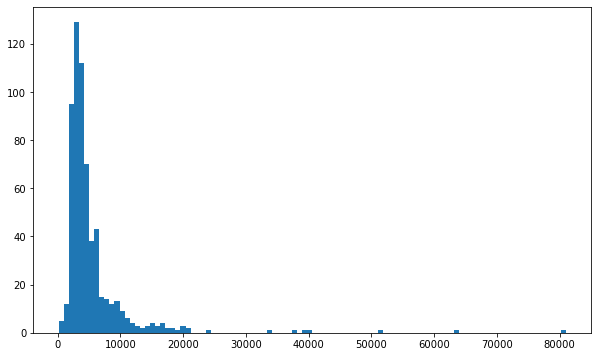

In [6]:
# выведем формы распределения числовых признаков
_, ax = plt.subplots(figsize=(10,6))
ax.hist(df_loan['ApplicantIncome'], bins=100)
plt.show()

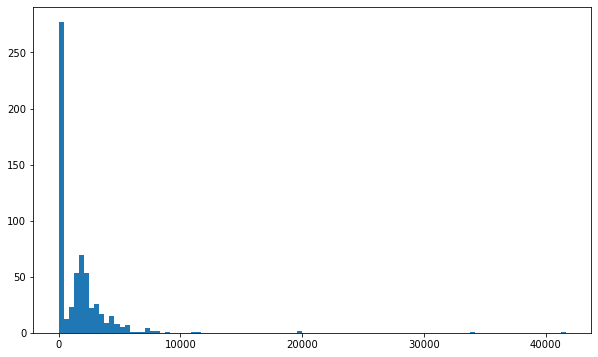

In [7]:
_, ax = plt.subplots(figsize=(10,6))
ax.hist(df_loan['CoapplicantIncome'], bins=100)
plt.show()

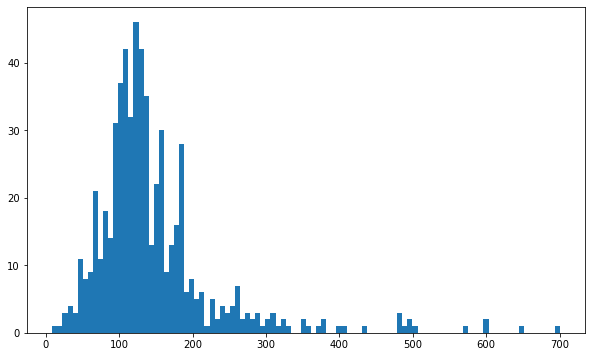

In [8]:
_, ax = plt.subplots(figsize=(10,6))
ax.hist(df_loan['LoanAmount'], bins=100)
plt.show()

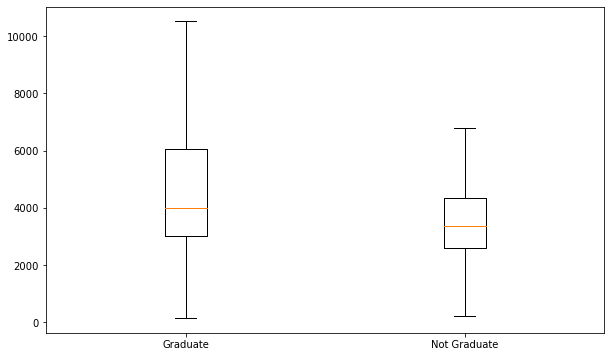

In [ ]:
# исследуем взаимосвязь между переменными (особенно между предикторами и целевой, зависимой переменной)
# находим несколько закономерностей и подтверждаем несколько гипотез
# например, иедианный доход людей с образованием выше чем у людей без образования
_, ax = plt.subplots(figsize=(10,6))

ax.boxplot(
    [
        df_loan[df_loan['Education'] == 'Graduate']['ApplicantIncome'],
        df_loan[df_loan['Education'] == 'Not Graduate']['ApplicantIncome'],
    ], 
    labels = [
        'Graduate',
        'Not Graduate'
    ],
    showfliers=False)

plt.show()

> ### Сводные таблицы
>  Pandas, как и Excel, позволяет работать со сводными таблицами. Это помогает, когда нужно исследовать зависимость переменных друг от друга. Например, у меня есть экспертное предположение, что процент одобрений по заявкам выше среди тех заемщиков, у кого есть кредитная история (_признак Credit_History равен 1.0_). Чтобы проверить это, я хочу посчитать, сколько раз целевая переменная _Loan_Status_ принимает значение _N_ и _Y_ для тех срок датасета, у которых признак _Credit_History_ равен 0.0. А потом – тоже самое, но для тех строк, где _Credit_History_ – 1.0. Решить такую задачу можно по-разному, лично я предпочитаю сводные таблицы. Посмотрите мой пример ниже, все довольно прозрачно и лаконично. Однако рекомендую разобраться с пивотами подробнее и отправляю к официальной документации по [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

In [9]:
# проверим гипотезу, что людя с кредитной историей подтверждают кредит чаще чем тем, у кого ее нет
# Сводная таблица вычислит сколько 'Y' и N' в колонке Loan_Status 
# для групп с разными значениеми в колонке Credit_History (в абсолютных числах)  
df_pivot = df_loan.pivot_table(index='Credit_History', columns='Loan_Status', aggfunc='size')

# Теперь переведем все в проценты, чтобы увидеть, какой процент из
# имеющих (не имеющих) кредитную историю получили (не получили) ссуду
df_pivot.iloc[0] = df_pivot.iloc[0]/df_pivot.iloc[0].sum()
df_pivot.iloc[1] = df_pivot.iloc[1]/df_pivot.iloc[1].sum()

df_pivot

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


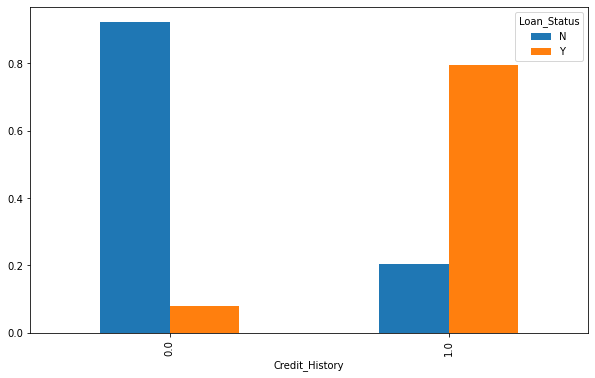

In [11]:
# Ну, и нарисуем все в виде столбчатой диаграммы 
df_pivot.plot(kind='bar', figsize=(10,6))
plt.show()

## Data Preparation

In [12]:
df_pred = df_loan.copy()

# Сохраним целевую переменную в отдельный датафрейм,
# заменяя значение 'Y' на 1.0, а значение 'N' на 0.0
df_label = df_pred['Loan_Status'].apply(lambda x: 1.0 if x == 'Y' else 0.0)

# Удаляем целевую переменную из датафрейма с передикторами
df_pred.drop('Loan_Status', axis=1, inplace=True)

Разведочный анализ показал, что пропущеные значения встречаются как среди категориальных признаков, так и среди числовых. Категориальные пропуски заполним модой (самым встречающимся значением), а численные пропуски – медианой. Сперва необходимо отделить числовые признаки от категориальных.

In [13]:
# Сохраним в переменную numerical имена всех числовых признаков нашего датасета
numerical = df_pred.select_dtypes(include=['int64', 'float64']).columns

# Сохраним в переменную categorical имена всех категориальных признаков нашего датасета
categorical = df_pred.select_dtypes(include=['object']).columns

print(numerical)
print(categorical)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


> _Pandas.DataFrame.select_dtypes_ выбирает столбцы по указанным типам данным. В нашем примере все **числовые** признаки имеют тип _int64_ или _float64_, а **категрориальные** – _object_. Для любопытных – ссылка на официальную документацию метода [pandas.DataFrame.select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

In [14]:
# Категориальные фичи
for feat in categorical:
    df_pred[feat].fillna(df_pred[feat].mode()[0], inplace=True)
    
# Численные фичи
for feat in numerical:
    df_pred[feat].fillna(df_pred[feat].median(), inplace=True)

# Убедимся, что пропущенных значений больше нет
df_pred.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Тперь необходимо "оцифровать" категориальные фичи. Будем использовать метод метод [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) из библиотеки Pandas. В модуле Data Preparation вы использовали OneHotEncoder из библиотеки sklearn и его методы fit/ptedict. [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) делает fit и predict одновременно, и, если вам нужно закодировать весь датасет целиком, можно использовать его: код становится короче.   

In [15]:
# Выполним преобразование OneHotEncoding для всех 
# категориальных признаков в нашем датасете
df_onehot = pd.get_dummies(df_pred[categorical])

df_onehot.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [16]:
# Теперь удалим из df_train оригинальные категориальные признаки
df_pred.drop(categorical, axis=1, inplace=True)

# И приклеим к нему эти же категориальные признаки, но закодированные в OneHot
df_pred = pd.concat([df_pred, df_onehot], axis=1)

# Убедимся, что нечисловых колонок больше нет
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    uint8  
 6   Gender_Male              614 non-null    uint8  
 7   Married_No               614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_0             614 non-null    uint8  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Dependents_3+            614 non-null    uint8  
 13  Education_Graduate       614 non-null    uint8  
 14  Education_Not Graduate   6

Далее необходимо привести значения числовых признаков к одному масштабу. Используем класс [SrandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Такое приобразование приведут к тому, что среднее значение (mean) каждого категориального признака будет равно нулю, а стандартное отклонение (standart deviation) – единице. Таким образом все числовые значения будут приведены к единому масштабу.  

In [17]:
scaler = StandardScaler()

# Масштабируем наши предикторы
df_pred = scaler.fit_transform(df_pred)

Предикторы и целевая переменная подготовлены к тренировке моделей. 

## Modeling

In [18]:
X = df_pred
y = df_label

Будем тестировать три модели: логистическую регрессию (_LogisticRegression_), ансамбль деревьев или случайный лес (_RandomForest_) и многослойный персептрон (_MLPClassifier_). 

In [19]:
models = [
    LogisticRegression(solver='liblinear'),
    RandomForestClassifier(),
    MLPClassifier(activation='logistic', hidden_layer_sizes = (256,128,64))
]

for m in models:
    score = cross_val_score(m, X, y, cv=4, scoring='accuracy')
    print(f'model: {type(m).__name__}, acc_mean: {score.mean():.4f}, acc_std: {score.std():.4f}')

model: LogisticRegression, acc_mean: 0.8014, acc_std: 0.0169
model: RandomForestClassifier, acc_mean: 0.7817, acc_std: 0.0210
model: MLPClassifier, acc_mean: 0.7948, acc_std: 0.0171
